<a href="https://colab.research.google.com/github/Hiranmai-T/EVA/blob/master/S6/EVA4_Assignment6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
import torch.nn.functional as F
dropout_value = 0.1
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 26

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) # output_size = 24

        # TRANSITION BLOCK 1
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 24
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 12

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            nn.Dropout(dropout_value)
        ) # output_size = 10
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 8
        self.pool2 = nn.MaxPool2d(2, 2)
        self.convblock9 = nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) # output_size = 6
        # self.convblock7 = nn.Sequential(
        #     nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
        #     nn.ReLU(),            
        #     nn.BatchNorm2d(16),
        #     nn.Dropout(dropout_value)
        # ) # output_size = 6
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=6)
        ) # output_size = 1

        self.convblock8 = nn.Sequential(
            #nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            # nn.BatchNorm2d(10),
            # nn.ReLU(),
            # nn.Dropout(dropout_value)
        ) 

        self.dropout = nn.Dropout(dropout_value)

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        #x = self.pool2(x)
        #x = self.convblock9(x)
        x = self.convblock6(x)
        #x = self.convblock7(x)
        x = self.gap(x)        
        x = self.convblock8(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [3]:

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,608
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
           Dropout-8           [-1, 32, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             256
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 10, 10, 10]             720
             ReLU-12           [-1, 10, 10, 10]               0
      BatchNorm2d-13           [-1, 10, 10, 10]              20
          Dropout-14           [-1, 10,

In [0]:
test_loss_l1=[]
test_acc_l1=[]
test_loss_l2=[]
test_acc_l2=[]
test_loss_both=[]
test_acc_both=[]
test_loss_none=[]
test_acc_none=[]

In [0]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [0]:
import copy

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

misclassified=[]
lambda1 = 0.0002
lambda2 = 0.0001
def train(model, device, train_loader, optimizer, epoch, reg):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    #loss += lambda1*torch.norm(model.parameters(),1)
    #model_params = torch.cat([x.view(-1) for x in model.parameters()])
    #loss += lambda1*torch.norm(model_params,1)
    # regularization_loss = 0
    # for param in model.parameters():
    #   regularization_loss += torch.sum(torch.abs(param))
    # loss += lambda1*regularization_loss
    regularization_loss1 = 0
    regularization_loss2 = 0

    # for param in model.parameters():
    #   regularization_loss1 += torch.norm(param,1)
    #   regularization_loss2 += torch.norm(param,2)
    # loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
    if reg=="None":
      train_losses.append(loss)
    elif reg=="L1":
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
      #regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1)
      train_losses.append(loss)
    elif reg=="L2":
      for param in model.parameters():
        #regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda2*regularization_loss2)
      train_losses.append(loss)
    else:
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
      train_losses.append(loss)




    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader, reg):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            temp = pred.eq(target.view_as(pred)).sum().item()
            temp1 = target.view_as(pred)
            if(len(misclassified)<25):
              for i in range(len(temp1)):
                if(temp1[i]!=pred[i]):
                  misclassified.append([data[i],temp1[i],pred[i]])
                if(len(misclassified)==25):
                  break
            correct += temp


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))
    

In [8]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
#scheduler = MultiStepLR(optimizer, [], gamma=0.1, last_epoch=-1)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 
#                                                      patience=3, 
#                                                      verbose=0, 
#                                                      factor=0.5, 
#                                                      min_lr=0.00001)

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,"None")
    # scheduler.step()
    test(model, device, test_loader,"None")
test_loss_none = copy.deepcopy(test_losses)
test_acc_none = copy.deepcopy(test_acc)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.1483100801706314 Batch_id=468 Accuracy=85.44: 100%|██████████| 469/469 [00:15<00:00, 30.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0950, Accuracy: 9751/10000 (97.51%)

EPOCH: 1


Loss=0.0909527912735939 Batch_id=468 Accuracy=97.01: 100%|██████████| 469/469 [00:15<00:00, 30.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0491, Accuracy: 9854/10000 (98.54%)

EPOCH: 2


Loss=0.06498897820711136 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:15<00:00, 31.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9882/10000 (98.82%)

EPOCH: 3


Loss=0.058994606137275696 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:15<00:00, 30.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9878/10000 (98.78%)

EPOCH: 4


Loss=0.07922058552503586 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:15<00:00, 29.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0306, Accuracy: 9910/10000 (99.10%)

EPOCH: 5


Loss=0.11427086591720581 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:15<00:00, 30.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9882/10000 (98.82%)

EPOCH: 6


Loss=0.024393601343035698 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:14<00:00, 31.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9922/10000 (99.22%)

EPOCH: 7


Loss=0.07628035545349121 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:15<00:00, 32.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9917/10000 (99.17%)

EPOCH: 8


Loss=0.05441591516137123 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:16<00:00, 28.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9923/10000 (99.23%)

EPOCH: 9


Loss=0.017025262117385864 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:16<00:00, 27.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 9910/10000 (99.10%)

EPOCH: 10


Loss=0.011016328819096088 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:16<00:00, 28.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9935/10000 (99.35%)

EPOCH: 11


Loss=0.037879228591918945 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:15<00:00, 29.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9927/10000 (99.27%)

EPOCH: 12


Loss=0.03054301254451275 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:15<00:00, 29.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0235, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.027896130457520485 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:16<00:00, 28.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 9919/10000 (99.19%)

EPOCH: 14


Loss=0.0219255480915308 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:16<00:00, 28.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9915/10000 (99.15%)

EPOCH: 15


Loss=0.009051998145878315 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:15<00:00, 30.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9934/10000 (99.34%)

EPOCH: 16


Loss=0.01018601655960083 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9926/10000 (99.26%)

EPOCH: 17


Loss=0.08725819736719131 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:15<00:00, 30.69it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0220, Accuracy: 9933/10000 (99.33%)

EPOCH: 18


Loss=0.050253454595804214 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:15<00:00, 30.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9925/10000 (99.25%)

EPOCH: 19


Loss=0.06272619217634201 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:15<00:00, 29.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9927/10000 (99.27%)

EPOCH: 20


Loss=0.030170029029250145 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:16<00:00, 29.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9929/10000 (99.29%)

EPOCH: 21


Loss=0.03901073709130287 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:16<00:00, 27.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

EPOCH: 22


Loss=0.02403981424868107 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:16<00:00, 28.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 9925/10000 (99.25%)

EPOCH: 23


Loss=0.04018644988536835 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:16<00:00, 28.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9935/10000 (99.35%)

EPOCH: 24


Loss=0.007954652421176434 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 28.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9926/10000 (99.26%)

EPOCH: 25


Loss=0.013592004776000977 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 28.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9930/10000 (99.30%)

EPOCH: 26


Loss=0.01843985915184021 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:16<00:00, 28.87it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9935/10000 (99.35%)

EPOCH: 27


Loss=0.00939622987061739 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 28.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9926/10000 (99.26%)

EPOCH: 28


Loss=0.023500656709074974 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 29.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9925/10000 (99.25%)

EPOCH: 29


Loss=0.01615719497203827 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:16<00:00, 28.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9935/10000 (99.35%)

EPOCH: 30


Loss=0.007154718041419983 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:16<00:00, 28.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9932/10000 (99.32%)

EPOCH: 31


Loss=0.00531025230884552 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:16<00:00, 28.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9928/10000 (99.28%)

EPOCH: 32


Loss=0.018743783235549927 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:15<00:00, 29.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9937/10000 (99.37%)

EPOCH: 33


Loss=0.022650480270385742 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:15<00:00, 30.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9945/10000 (99.45%)

EPOCH: 34


Loss=0.18785418570041656 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:15<00:00, 30.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9933/10000 (99.33%)

EPOCH: 35


Loss=0.006887937430292368 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:15<00:00, 29.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9938/10000 (99.38%)

EPOCH: 36


Loss=0.10896434634923935 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:15<00:00, 29.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9932/10000 (99.32%)

EPOCH: 37


Loss=0.04105006903409958 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:15<00:00, 29.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9934/10000 (99.34%)

EPOCH: 38


Loss=0.01019063126295805 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:15<00:00, 30.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9936/10000 (99.36%)

EPOCH: 39


Loss=0.0012430548667907715 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:15<00:00, 29.70it/s]



Test set: Average loss: 0.0193, Accuracy: 9939/10000 (99.39%)



In [9]:
len(test_acc_none)

40

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

misclassified=[]
lambda1 = 0.0002
lambda2 = 0.0001
def train(model, device, train_loader, optimizer, epoch, reg):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    #loss += lambda1*torch.norm(model.parameters(),1)
    #model_params = torch.cat([x.view(-1) for x in model.parameters()])
    #loss += lambda1*torch.norm(model_params,1)
    # regularization_loss = 0
    # for param in model.parameters():
    #   regularization_loss += torch.sum(torch.abs(param))
    # loss += lambda1*regularization_loss
    regularization_loss1 = 0
    regularization_loss2 = 0

    # for param in model.parameters():
    #   regularization_loss1 += torch.norm(param,1)
    #   regularization_loss2 += torch.norm(param,2)
    # loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
    if reg=="None":
      train_losses.append(loss)
    elif reg=="L1":
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
      #regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1)
      train_losses.append(loss)
    elif reg=="L2":
      for param in model.parameters():
        #regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda2*regularization_loss2)
      train_losses.append(loss)
    else:
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
      train_losses.append(loss)




    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader, reg):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            temp = pred.eq(target.view_as(pred)).sum().item()
            temp1 = target.view_as(pred)
            if(len(misclassified)<25):
              for i in range(len(temp1)):
                if(temp1[i]!=pred[i]):
                  misclassified.append([data[i],temp1[i],pred[i]])
                if(len(misclassified)==25):
                  break
            correct += temp


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))
    

In [22]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,"L2")
    # scheduler.step()
    test(model, device, test_loader,"L2")
test_loss_l1 = copy.deepcopy(test_losses)
test_acc_l1 = copy.deepcopy(test_acc)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.2055327445268631 Batch_id=468 Accuracy=84.87: 100%|██████████| 469/469 [00:16<00:00, 26.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1041, Accuracy: 9728/10000 (97.28%)

EPOCH: 1


Loss=0.11043021082878113 Batch_id=468 Accuracy=96.75: 100%|██████████| 469/469 [00:16<00:00, 29.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9849/10000 (98.49%)

EPOCH: 2


Loss=0.1569320112466812 Batch_id=468 Accuracy=97.55: 100%|██████████| 469/469 [00:18<00:00, 24.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0517, Accuracy: 9834/10000 (98.34%)

EPOCH: 3


Loss=0.025543786585330963 Batch_id=468 Accuracy=97.92: 100%|██████████| 469/469 [00:19<00:00, 23.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0433, Accuracy: 9855/10000 (98.55%)

EPOCH: 4


Loss=0.0998992994427681 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 24.48it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0366, Accuracy: 9882/10000 (98.82%)

EPOCH: 5


Loss=0.049547530710697174 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:19<00:00, 24.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9889/10000 (98.89%)

EPOCH: 6


Loss=0.03681078180670738 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:19<00:00, 24.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9906/10000 (99.06%)

EPOCH: 7


Loss=0.0657879188656807 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:19<00:00, 25.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 9911/10000 (99.11%)

EPOCH: 8


Loss=0.03242981433868408 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:19<00:00, 25.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0280, Accuracy: 9913/10000 (99.13%)

EPOCH: 9


Loss=0.07096605002880096 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:19<00:00, 23.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9912/10000 (99.12%)

EPOCH: 10


Loss=0.06160851567983627 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:19<00:00, 24.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9915/10000 (99.15%)

EPOCH: 11


Loss=0.01721879653632641 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:17<00:00, 27.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9900/10000 (99.00%)

EPOCH: 12


Loss=0.048018693923950195 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9929/10000 (99.29%)

EPOCH: 13


Loss=0.07819008082151413 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:19<00:00, 24.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9918/10000 (99.18%)

EPOCH: 14


Loss=0.018761031329631805 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:18<00:00, 24.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9924/10000 (99.24%)

EPOCH: 15


Loss=0.027313482016324997 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:19<00:00, 24.61it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9914/10000 (99.14%)

EPOCH: 16


Loss=0.015157749876379967 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:18<00:00, 25.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9918/10000 (99.18%)

EPOCH: 17


Loss=0.03752615302801132 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9923/10000 (99.23%)

EPOCH: 18


Loss=0.02380312979221344 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9930/10000 (99.30%)

EPOCH: 19


Loss=0.06286723166704178 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:17<00:00, 26.40it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9928/10000 (99.28%)

EPOCH: 20


Loss=0.01538131944835186 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:17<00:00, 26.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9923/10000 (99.23%)

EPOCH: 21


Loss=0.04415389150381088 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

EPOCH: 22


Loss=0.09709802269935608 Batch_id=468 Accuracy=98.91: 100%|██████████| 469/469 [00:17<00:00, 28.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

EPOCH: 23


Loss=0.0577264130115509 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9922/10000 (99.22%)

EPOCH: 24


Loss=0.0156618170440197 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:17<00:00, 26.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9939/10000 (99.39%)

EPOCH: 25


Loss=0.052642203867435455 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:16<00:00, 27.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9917/10000 (99.17%)

EPOCH: 26


Loss=0.025457588955760002 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:17<00:00, 27.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9924/10000 (99.24%)

EPOCH: 27


Loss=0.04393332451581955 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:17<00:00, 27.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9942/10000 (99.42%)

EPOCH: 28


Loss=0.04803033918142319 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:17<00:00, 27.15it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9936/10000 (99.36%)

EPOCH: 29


Loss=0.01117666158825159 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:17<00:00, 27.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

EPOCH: 30


Loss=0.053461894392967224 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9936/10000 (99.36%)

EPOCH: 31


Loss=0.013070743530988693 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:16<00:00, 30.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9932/10000 (99.32%)

EPOCH: 32


Loss=0.03454133868217468 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:17<00:00, 27.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0187, Accuracy: 9933/10000 (99.33%)

EPOCH: 33


Loss=0.02160518802702427 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:17<00:00, 26.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9930/10000 (99.30%)

EPOCH: 34


Loss=0.03636688366532326 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:17<00:00, 27.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9929/10000 (99.29%)

EPOCH: 35


Loss=0.03270456939935684 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:17<00:00, 26.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9936/10000 (99.36%)

EPOCH: 36


Loss=0.0738220363855362 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:17<00:00, 26.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 9935/10000 (99.35%)

EPOCH: 37


Loss=0.01889592781662941 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:17<00:00, 27.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9922/10000 (99.22%)

EPOCH: 38


Loss=0.042626067996025085 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:16<00:00, 29.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0203, Accuracy: 9933/10000 (99.33%)

EPOCH: 39


Loss=0.029361512511968613 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:17<00:00, 24.06it/s]



Test set: Average loss: 0.0187, Accuracy: 9936/10000 (99.36%)



In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

misclassified=[]
lambda1 = 0.0002
lambda2 = 0.0001
def train(model, device, train_loader, optimizer, epoch, reg):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    #loss += lambda1*torch.norm(model.parameters(),1)
    #model_params = torch.cat([x.view(-1) for x in model.parameters()])
    #loss += lambda1*torch.norm(model_params,1)
    # regularization_loss = 0
    # for param in model.parameters():
    #   regularization_loss += torch.sum(torch.abs(param))
    # loss += lambda1*regularization_loss
    regularization_loss1 = 0
    regularization_loss2 = 0

    # for param in model.parameters():
    #   regularization_loss1 += torch.norm(param,1)
    #   regularization_loss2 += torch.norm(param,2)
    # loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
    if reg=="None":
      train_losses.append(loss)
    elif reg=="L1":
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
      #regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1)
      train_losses.append(loss)
    elif reg=="L2":
      for param in model.parameters():
        #regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda2*regularization_loss2)
      train_losses.append(loss)
    else:
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
      train_losses.append(loss)




    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader, reg):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            temp = pred.eq(target.view_as(pred)).sum().item()
            temp1 = target.view_as(pred)
            if(len(misclassified)<25):
              for i in range(len(temp1)):
                if(temp1[i]!=pred[i]):
                  misclassified.append([data[i],temp1[i],pred[i]])
                if(len(misclassified)==25):
                  break
            correct += temp


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))


In [13]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,"L2")
    # scheduler.step()
    test(model, device, test_loader,"L2")
test_loss_l2 = copy.deepcopy(test_losses)
test_acc_l2 = copy.deepcopy(test_acc)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.1938549280166626 Batch_id=468 Accuracy=85.92: 100%|██████████| 469/469 [00:15<00:00, 30.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1160, Accuracy: 9677/10000 (96.77%)

EPOCH: 1


Loss=0.04135170951485634 Batch_id=468 Accuracy=96.77: 100%|██████████| 469/469 [00:15<00:00, 30.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0853, Accuracy: 9750/10000 (97.50%)

EPOCH: 2


Loss=0.08337576687335968 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:15<00:00, 30.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0485, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.030131522566080093 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0484, Accuracy: 9849/10000 (98.49%)

EPOCH: 4


Loss=0.12663927674293518 Batch_id=468 Accuracy=98.22: 100%|██████████| 469/469 [00:15<00:00, 30.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0410, Accuracy: 9884/10000 (98.84%)

EPOCH: 5


Loss=0.07316466420888901 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:15<00:00, 30.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9889/10000 (98.89%)

EPOCH: 6


Loss=0.08773573487997055 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:15<00:00, 30.83it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0349, Accuracy: 9890/10000 (98.90%)

EPOCH: 7


Loss=0.04574890062212944 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:15<00:00, 29.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9901/10000 (99.01%)

EPOCH: 8


Loss=0.033206094056367874 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:15<00:00, 31.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0386, Accuracy: 9878/10000 (98.78%)

EPOCH: 9


Loss=0.04930755868554115 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:16<00:00, 28.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0255, Accuracy: 9926/10000 (99.26%)

EPOCH: 10


Loss=0.056332480162382126 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:15<00:00, 31.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9894/10000 (98.94%)

EPOCH: 11


Loss=0.13852418959140778 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:17<00:00, 27.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9894/10000 (98.94%)

EPOCH: 12


Loss=0.08321560174226761 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:16<00:00, 28.78it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9911/10000 (99.11%)

EPOCH: 13


Loss=0.02180495671927929 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:15<00:00, 30.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9927/10000 (99.27%)

EPOCH: 14


Loss=0.07205605506896973 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:15<00:00, 30.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0321, Accuracy: 9909/10000 (99.09%)

EPOCH: 15


Loss=0.027764180675148964 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:15<00:00, 30.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9932/10000 (99.32%)

EPOCH: 16


Loss=0.06970390677452087 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:15<00:00, 31.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9930/10000 (99.30%)

EPOCH: 17


Loss=0.05211446434259415 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:15<00:00, 31.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9924/10000 (99.24%)

EPOCH: 18


Loss=0.014631932601332664 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:15<00:00, 30.22it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0265, Accuracy: 9914/10000 (99.14%)

EPOCH: 19


Loss=0.058821193873882294 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:15<00:00, 31.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9935/10000 (99.35%)

EPOCH: 20


Loss=0.017565393820405006 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:15<00:00, 30.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9923/10000 (99.23%)

EPOCH: 21


Loss=0.014514773152768612 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:15<00:00, 30.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0249, Accuracy: 9915/10000 (99.15%)

EPOCH: 22


Loss=0.012258276343345642 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:14<00:00, 31.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 9924/10000 (99.24%)

EPOCH: 23


Loss=0.02199687622487545 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:14<00:00, 31.04it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0210, Accuracy: 9935/10000 (99.35%)

EPOCH: 24


Loss=0.03638264164328575 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:15<00:00, 31.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9927/10000 (99.27%)

EPOCH: 25


Loss=0.03382899612188339 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:15<00:00, 30.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9932/10000 (99.32%)

EPOCH: 26


Loss=0.03803899139165878 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:14<00:00, 31.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9934/10000 (99.34%)

EPOCH: 27


Loss=0.022439543157815933 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:14<00:00, 32.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9929/10000 (99.29%)

EPOCH: 28


Loss=0.04034854844212532 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:15<00:00, 33.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9942/10000 (99.42%)

EPOCH: 29


Loss=0.02336895652115345 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:15<00:00, 31.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9924/10000 (99.24%)

EPOCH: 30


Loss=0.021742526441812515 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:15<00:00, 30.96it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0253, Accuracy: 9921/10000 (99.21%)

EPOCH: 31


Loss=0.02128894254565239 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:15<00:00, 31.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9936/10000 (99.36%)

EPOCH: 32


Loss=0.027228601276874542 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:14<00:00, 30.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 9941/10000 (99.41%)

EPOCH: 33


Loss=0.04787825793027878 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:15<00:00, 30.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9938/10000 (99.38%)

EPOCH: 34


Loss=0.012425364926457405 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:14<00:00, 31.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0224, Accuracy: 9931/10000 (99.31%)

EPOCH: 35


Loss=0.009019755758345127 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:15<00:00, 30.80it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0189, Accuracy: 9939/10000 (99.39%)

EPOCH: 36


Loss=0.041542600840330124 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:15<00:00, 31.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 9936/10000 (99.36%)

EPOCH: 37


Loss=0.056499119848012924 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:15<00:00, 30.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9933/10000 (99.33%)

EPOCH: 38


Loss=0.05154906585812569 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:15<00:00, 31.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0194, Accuracy: 9934/10000 (99.34%)

EPOCH: 39


Loss=0.05517839267849922 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:15<00:00, 30.82it/s]



Test set: Average loss: 0.0199, Accuracy: 9933/10000 (99.33%)



In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

misclassified=[]
lambda1 = 0.0002
lambda2 = 0.0001
def train(model, device, train_loader, optimizer, epoch, reg):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    #loss += lambda1*torch.norm(model.parameters(),1)
    #model_params = torch.cat([x.view(-1) for x in model.parameters()])
    #loss += lambda1*torch.norm(model_params,1)
    # regularization_loss = 0
    # for param in model.parameters():
    #   regularization_loss += torch.sum(torch.abs(param))
    # loss += lambda1*regularization_loss
    regularization_loss1 = 0
    regularization_loss2 = 0

    # for param in model.parameters():
    #   regularization_loss1 += torch.norm(param,1)
    #   regularization_loss2 += torch.norm(param,2)
    # loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
    if reg=="None":
      train_losses.append(loss)
    elif reg=="L1":
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
      #regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1)
      train_losses.append(loss)
    elif reg=="L2":
      for param in model.parameters():
        #regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda2*regularization_loss2)
      train_losses.append(loss)
    else:
      for param in model.parameters():
        regularization_loss1 += torch.norm(param,1)
        regularization_loss2 += torch.norm(param,2)
      loss += (lambda1*regularization_loss1+lambda2*regularization_loss2)
      train_losses.append(loss)




    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader, reg):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            temp = pred.eq(target.view_as(pred)).sum().item()
            temp1 = target.view_as(pred)
            if(len(misclassified)<25):
              for i in range(len(temp1)):
                if(temp1[i]!=pred[i]):
                  misclassified.append([data[i],temp1[i],pred[i]])
                if(len(misclassified)==25):
                  break
            correct += temp


    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))
    

In [25]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch,"Both")
    # scheduler.step()
    test(model, device, test_loader,"Both")
test_loss_both = copy.deepcopy(test_losses)
test_acc_both = copy.deepcopy(test_acc)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.2995688319206238 Batch_id=468 Accuracy=85.51: 100%|██████████| 469/469 [00:18<00:00, 24.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1098, Accuracy: 9737/10000 (97.37%)

EPOCH: 1


Loss=0.2283187359571457 Batch_id=468 Accuracy=96.77: 100%|██████████| 469/469 [00:18<00:00, 25.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0632, Accuracy: 9828/10000 (98.28%)

EPOCH: 2


Loss=0.15055495500564575 Batch_id=468 Accuracy=97.59: 100%|██████████| 469/469 [00:18<00:00, 25.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0455, Accuracy: 9867/10000 (98.67%)

EPOCH: 3


Loss=0.24222484230995178 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:18<00:00, 25.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0411, Accuracy: 9877/10000 (98.77%)

EPOCH: 4


Loss=0.17469564080238342 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:17<00:00, 26.36it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0396, Accuracy: 9884/10000 (98.84%)

EPOCH: 5


Loss=0.1912420094013214 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:18<00:00, 25.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0467, Accuracy: 9854/10000 (98.54%)

EPOCH: 6


Loss=0.1495334655046463 Batch_id=468 Accuracy=98.18: 100%|██████████| 469/469 [00:18<00:00, 25.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0359, Accuracy: 9888/10000 (98.88%)

EPOCH: 7


Loss=0.1342485398054123 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9888/10000 (98.88%)

EPOCH: 8


Loss=0.2329074591398239 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:17<00:00, 25.05it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 9897/10000 (98.97%)

EPOCH: 9


Loss=0.25492697954177856 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:17<00:00, 26.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9887/10000 (98.87%)

EPOCH: 10


Loss=0.1761055886745453 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:18<00:00, 25.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9893/10000 (98.93%)

EPOCH: 11


Loss=0.11675980687141418 Batch_id=468 Accuracy=98.35: 100%|██████████| 469/469 [00:18<00:00, 25.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0356, Accuracy: 9890/10000 (98.90%)

EPOCH: 12


Loss=0.14073368906974792 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:17<00:00, 25.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)

EPOCH: 13


Loss=0.14913281798362732 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:17<00:00, 26.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9888/10000 (98.88%)

EPOCH: 14


Loss=0.11969489604234695 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:17<00:00, 26.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9894/10000 (98.94%)

EPOCH: 15


Loss=0.1550019383430481 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:19<00:00, 23.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9885/10000 (98.85%)

EPOCH: 16


Loss=0.10512829571962357 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:19<00:00, 25.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 9864/10000 (98.64%)

EPOCH: 17


Loss=0.10082501173019409 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:19<00:00, 25.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9895/10000 (98.95%)

EPOCH: 18


Loss=0.10138494521379471 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:20<00:00, 23.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0417, Accuracy: 9868/10000 (98.68%)

EPOCH: 19


Loss=0.12785346806049347 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:17<00:00, 26.06it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9875/10000 (98.75%)

EPOCH: 20


Loss=0.1281708925962448 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:19<00:00, 24.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 9900/10000 (99.00%)

EPOCH: 21


Loss=0.12655684351921082 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:19<00:00, 23.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0334, Accuracy: 9897/10000 (98.97%)

EPOCH: 22


Loss=0.1105702817440033 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:19<00:00, 23.56it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0307, Accuracy: 9915/10000 (99.15%)

EPOCH: 23


Loss=0.15921464562416077 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:19<00:00, 23.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 9895/10000 (98.95%)

EPOCH: 24


Loss=0.08979702740907669 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 9901/10000 (99.01%)

EPOCH: 25


Loss=0.12399417161941528 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:18<00:00, 24.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9887/10000 (98.87%)

EPOCH: 26


Loss=0.13106688857078552 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:18<00:00, 25.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0388, Accuracy: 9870/10000 (98.70%)

EPOCH: 27


Loss=0.09427876025438309 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:17<00:00, 27.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0382, Accuracy: 9881/10000 (98.81%)

EPOCH: 28


Loss=0.12641450762748718 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:17<00:00, 25.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0310, Accuracy: 9902/10000 (99.02%)

EPOCH: 29


Loss=0.09491708129644394 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:18<00:00, 24.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0298, Accuracy: 9904/10000 (99.04%)

EPOCH: 30


Loss=0.11839675903320312 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:17<00:00, 26.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9908/10000 (99.08%)

EPOCH: 31


Loss=0.11774467676877975 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:17<00:00, 26.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 9893/10000 (98.93%)

EPOCH: 32


Loss=0.09743750840425491 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:18<00:00, 25.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9910/10000 (99.10%)

EPOCH: 33


Loss=0.10518535226583481 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:17<00:00, 26.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0274, Accuracy: 9910/10000 (99.10%)

EPOCH: 34


Loss=0.15118159353733063 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:18<00:00, 25.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0341, Accuracy: 9882/10000 (98.82%)

EPOCH: 35


Loss=0.1833624243736267 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:18<00:00, 24.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9898/10000 (98.98%)

EPOCH: 36


Loss=0.13040070235729218 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:17<00:00, 26.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

EPOCH: 37


Loss=0.13151584565639496 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:17<00:00, 26.31it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9899/10000 (98.99%)

EPOCH: 38


Loss=0.17903423309326172 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:18<00:00, 25.49it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 9907/10000 (99.07%)

EPOCH: 39


Loss=0.11707952618598938 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:17<00:00, 29.31it/s]



Test set: Average loss: 0.0395, Accuracy: 9878/10000 (98.78%)



Text(0.5, 1.0, 'Test Accuracy')

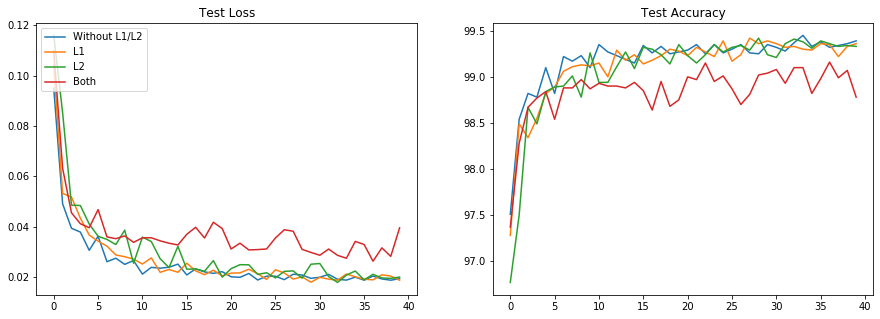

In [26]:
import matplotlib.pyplot as plt
# test_loss_l1=[]
# test_acc_l1=[]
# test_loss_l2=[]
# test_acc_l2=[]
# test_loss_both=[]
# test_acc_both=[]
# test_loss_none=[]
# test_acc_none=[]
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(test_loss_none)
axs[0].plot(test_loss_l1)
axs[0].plot(test_loss_l2)
axs[0].plot(test_loss_both)
axs[0].legend(['Without L1/L2', 'L1', 'L2', 'Both'], loc='upper left')
axs[0].set_title("Test Loss")
axs[1].plot(test_acc_none)
axs[1].plot(test_acc_l1)
axs[1].plot(test_acc_l2)
axs[1].plot(test_acc_both)
axs[0].legend(['Without L1/L2', 'L1', 'L2', 'Both'], loc='upper left')
axs[1].set_title("Test Accuracy")

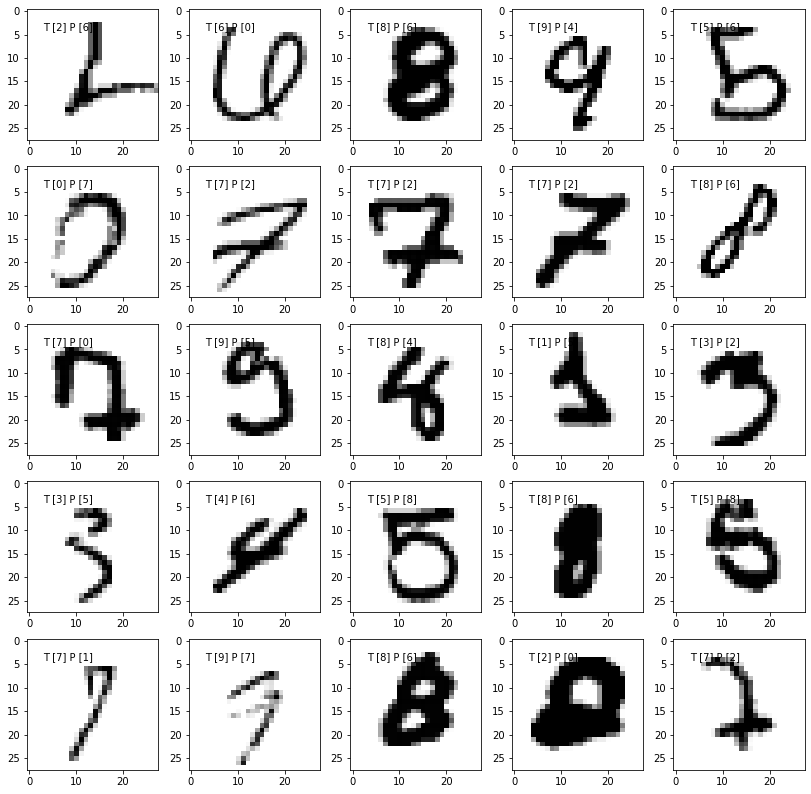

In [17]:
fig, axs = plt.subplots(5,5,figsize=(14,14))
index=0
for i in range(5):
  for j in range(5):
    data,t,p = misclassified[index]
    axs[i,j].imshow(data.cpu().numpy().squeeze(), cmap='gray_r')
    #axs[i,j].set_title(str(t.cpu().numpy())+" "+str(p.cpu().numpy()))
    axs[i,j].annotate("T "+str(t.cpu().numpy())+" P "+str(p.cpu().numpy()),(3,4))
    index+=1;
